In [1]:
pip install langgraph

  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.1.129
    Uninstalling langsmith-0.1.129:
      Successfully uninstalled langsmith-0.1.129
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.7
    Uninstalling langchain-core-0.3.7:
      Successfully uninstalled langchain-core-0.3.7
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.1 requires langsmith<0.2.0,>=0.1.17, but you have langsmith 0.4.16 which is incompatible.
langchain-community 0.3.1 requires langsmith<0.2.0,>=0.1.125, but you have langsmith 0.4.16 which is incompatible.


In [3]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [4]:
class AgentState(TypedDict):
    message: str


def compliment_node(state: AgentState):
    '''Node that complements the user'''
    state['message']='hey '+state['message']+' you are doing great work by learning langgraph'
    return state

In [5]:
graph=StateGraph(AgentState)
graph.add_node('Compliment',compliment_node)
graph.set_entry_point('Compliment')
graph.set_finish_point('Compliment')
app=graph.compile()

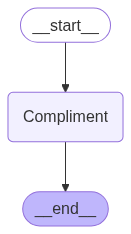

In [7]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [9]:
res=app.invoke({'message':'zain'})
res['message']

'hey zain you are doing great work by learning langgraph'